# Exercise 4.9 Task Part 2
## 3. Create a histogram
## 4. Create a bar chart
## 5. Sampling data and creating a line chart
## 6. Create a line chart
## 7. Create a scatter plot

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
# load the path shortcut

path = r'C:\Users\User\241025_Instacart Basket Analysis'

In [8]:
# import the current data frame

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_products_customers_merge.pkl'))

## 3. Create a histogram

In [10]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


<Axes: ylabel='Frequency'>

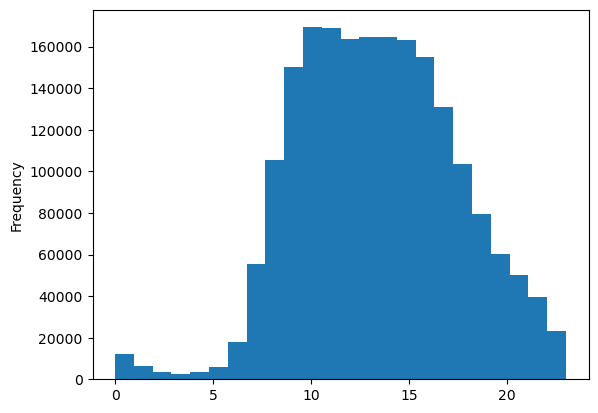

In [11]:
# creating a histogram of the “order_hour_of_day” column

ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

### The most orders are effectuated between 9 am and 16 pm.

## 4. Create a bar chart

In [14]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status'],
      dtype='object')

<Axes: xlabel='loyalty_flag'>

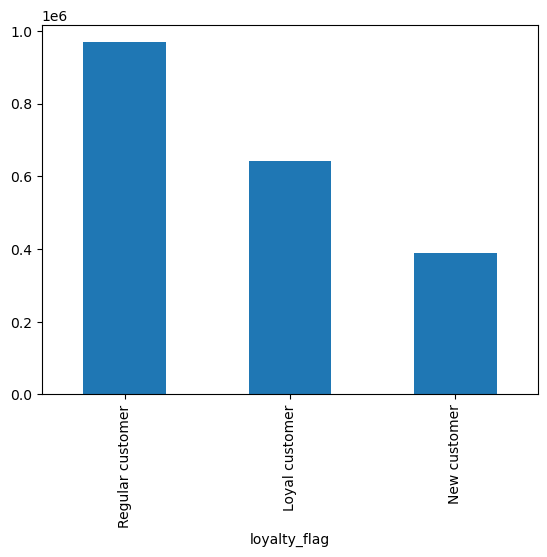

In [15]:
# create a bar chart

ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

## 5. Sample data and create a line chart (to check difference in expenditure (the “prices” column) depending on hour of the day)


In [17]:
# Create a random sample by generating a seed

np.random.seed(4)

In [18]:
# Create a dev list with a data split of 70/30

dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [29]:
# Split the dataframe into two samples

big = ords_prods_cust_merge[dev]
small = ords_prods_cust_merge[~dev]

In [31]:
# check

len(ords_prods_cust_merge)

2000000

In [33]:
len(big) + len(small)

2000000

In [35]:
small.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
10,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [37]:
# reducing sample to only those columns necessary for the chart, namely “prices” and “orders_day_of_week to speed up processing

df_2 = small[['order_hour_of_day','prices']] 

In [41]:
df_2.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


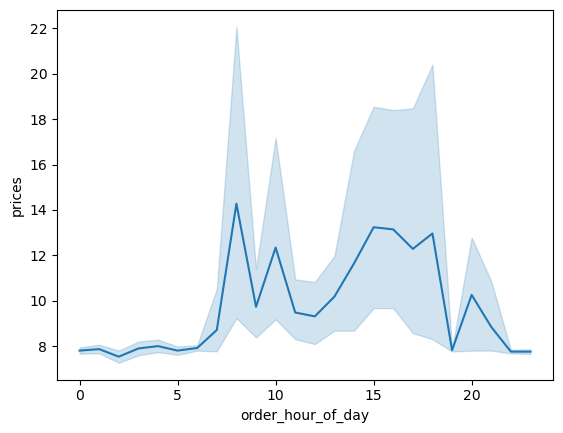

In [47]:
# create line chart

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## 6. Create a line chart (to determine whether there’s a connection between age and family situation (age/dependents))

In [52]:
# reducing sample to only those columns necessary for the chart, namely “prices” and “orders_day_of_week to speed up processing

df_3 = small[['Age','n_dependants']] 

In [54]:
df_3.head()

,Age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


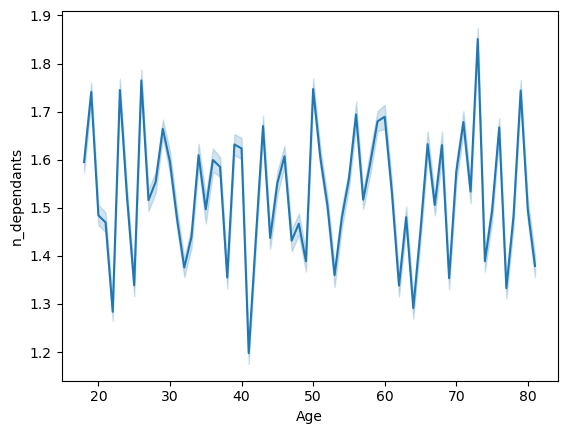

In [56]:
# create line chart

line = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

### The line chart shows no conclusive proof that there is a connection between age an the number of dependants.

## 7. Create a scatter plot (to explore whether there is a connection between income and age)

<Axes: xlabel='Age', ylabel='income'>

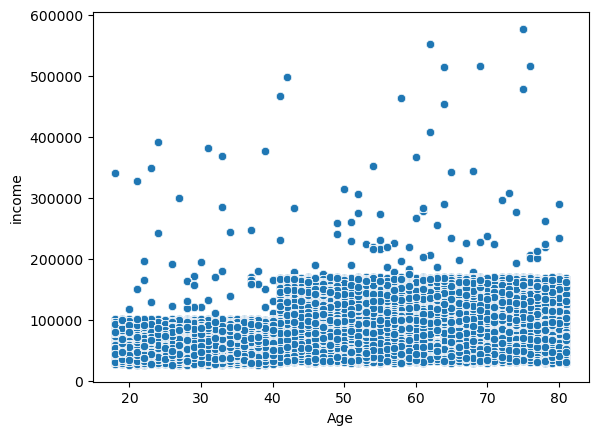

In [61]:
sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cust_merge)

### The scatterplot of age and income shows that individuals under 40 years old tend to have lower income levels, while those aged 40 and above exhibit a pattern of higher income. This trend is fairly consistent, although some outliers are present.